<a href="https://colab.research.google.com/github/Cristsep/Machine-Learning-Model-Test1/blob/main/014_Desarrollo_Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafío 1: Preparación del ambiente de trabajo


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




*   Importe los módulos básicos para el análisis de datos
*   Importe seaborn
*   Importe statsmodels
*   Importe LogisticRegression , train_test_split , StandardScaler ,
classification_report y roc_curve de sklearn


In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

data = pd.read_csv('/content/drive/MyDrive/Curso Advance Analytics UNAB/Google Colab/Trabajo final/014/default_credit.csv')

print(data.head())
print()
print(data.shape)
print()
print(data.dtypes)
print()

data=data.drop(['index'], axis=1)
print(data.head(10))



   index default student      balance        income
0      1      No      No   729.526495  44361.625074
1      2      No     Yes   817.180407  12106.134700
2      3      No      No  1073.549164  31767.138947
3      4      No      No   529.250605  35704.493935
4      5      No      No   785.655883  38463.495879

(10000, 5)

index        int64
default     object
student     object
balance    float64
income     float64
dtype: object

  default student      balance        income
0      No      No   729.526495  44361.625074
1      No     Yes   817.180407  12106.134700
2      No      No  1073.549164  31767.138947
3      No      No   529.250605  35704.493935
4      No      No   785.655883  38463.495879
5      No     Yes   919.588530   7491.558572
6      No      No   825.513331  24905.226578
7      No     Yes   808.667504  17600.451344
8      No      No  1161.057854  37468.529288
9      No      No     0.000000  29275.268293


# Desafío 2: Análisis exploratorio



*   Explore las principales relaciones entre las variables. Utilizando los métodos boxplot y lmplot de seaborn implemente los siguientes gráficos.
 *     Un boxplot del balance total de las cuentas, segmentado por el status de estudiante.
 *     Un boxplot del ingreso total de cada cliente, segmentado por el status de estudiante.
 *     Un boxplot del balance total de las cuentas, segmentado por el status de default.
 *     Un boxplot del ingreso total de cada cliente, segmentado por el status de default.
 *     Un diagrama de dispersión entre balance e income , segmentado por el status de
estudiante.
 *     Un diagrama de dispersión entre balance e income , segmentado por el status de default.
*   Comente brevemente sobre los principales patrones de comportamiento.
*   tip: Puede utilizar el argumento hue en lmplot para identificar las observaciones por
status.



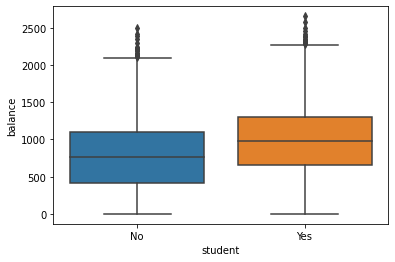

In [ ]:
ax1 = sns.boxplot(x="student", y="balance", data=data)

Es posible apreciar que quienes son estudiantes poseen en general un mayor saldo en la cuenta de crédito en comparación con quienes no son estudiantes.

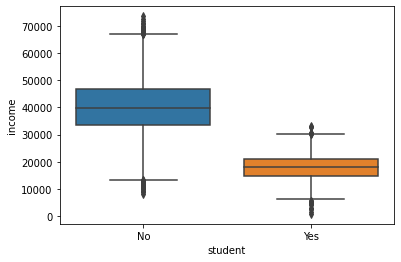

In [ ]:
ax2 = sns.boxplot(x="student", y="income", data=data)

Como se esperaba, los clientes que no son estudiantes poseen mucho más elevados ingresos que los estudiantes.

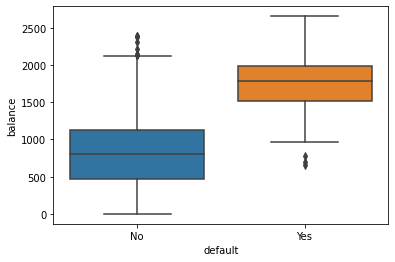

In [ ]:
ax3 = sns.boxplot(x="default", y="balance", data=data)

Se puede apreciar que los clientes que registran morosidad poseen en general un mayor total de saldo en la cuenta de crédito.

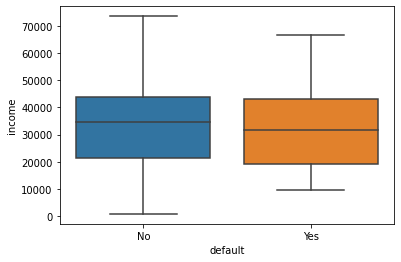

In [ ]:
ax4 = sns.boxplot(x="default", y="income", data=data)

En esta gráfica podemos notar que que tanto los clientes morosos y no morosos poseen mayormente similares ingresos.

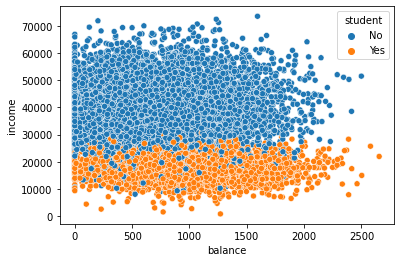

In [ ]:
ax5 = sns.scatterplot(x="balance", y="income", hue="student", data=data)

De este gráfico podemos concluir que el los ingresos de los clientes son más bien indepdiente del saldo en la cuente de crédito, sino que más bien responde a si estos clientes son estudiantes o no.

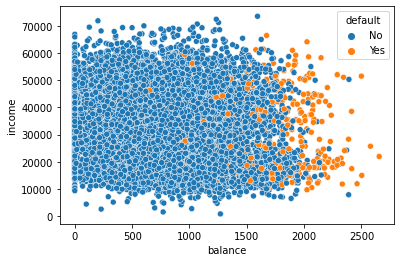

In [ ]:
ax6 = sns.scatterplot(x="balance", y="income", hue="default", data=data)

En este gráfico podemos apreciar que es un porcentaje menor los clientes que se encuentran morosos y por lo general esos son quienes un mayor saldo en su cuenta de crédito. 

# Desafío 3: Modelación econométrica



*   Recodifique las variables student y default para que adquieran atributos numéricos.




In [ ]:
i=0
for default in data['default']:
  if default == "No":
    data.loc[i, "default"] = 0
  else:
    data.loc[i, "default"] = 1
  i+=1

j=0
for student in data['student']:
  if student == "No":
    data.loc[j, 'student'] = 0
  else:
    data.loc[j, 'student'] = 1
  j+=1

data.head(10)

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879
5,0,1,919.588530,7491.558572
6,0,0,825.513331,24905.226578
7,0,1,808.667504,17600.451344
8,0,0,1161.057854,37468.529288
9,0,0,0.000000,29275.268293


# Desafío 4.a: Entrenar (Clasificacion default)

A partir del modelo depurado, genere un modelo predictivo con las siguientes características:
*   Estandarize la matriz de atributos.
*   Genere subconjuntos de entrenamiento y validación, separando el 33% de la muestra en el
conjunto de validación.
*   Implemente el modelo sin alterar los hiperparámetros.
*   Genere la predicción de las clases y de la probabilidad.
*   Reporte las métricas de precision, recall y f1 para ambas clases.
*   Grafique la curva Receiver Operator Characteristic.
*   En base a los pasos, comente sobre el desempeño predictivo del modelo.




In [ ]:
x1 = data.iloc[:,1:].values
y1 = data.iloc[:,0].values

sc1 = StandardScaler()
x1 = sc1.fit_transform(x1)

y1=y1.astype('int')

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=0.33, random_state=0)

modelo1 = LogisticRegression()
modelo1.fit(x1_train,y1_train)

y1_pred = modelo1.predict(x1_test)

print('Datos de entrenamiento')
print(y1_test)
print('Datos obtenidos en la prediccion')
print(y1_pred)


Datos de entrenamiento
[0 0 0 ... 0 0 0]
Datos obtenidos en la prediccion
[0 0 0 ... 0 0 0]


Se crea un modelo de clasidicación que predice si el cliente se encuentra o no en mora.

In [ ]:
reporte1 = classification_report(y1_test, y1_pred)
print(reporte1)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3177
           1       0.79      0.34      0.48       123

    accuracy                           0.97      3300
   macro avg       0.88      0.67      0.73      3300
weighted avg       0.97      0.97      0.97      3300



Se aprecia un puntaje f1 de 0.99 resultado de los altos valores de precisión y sensibilidad para determinar que los clientes no se encuentran morosos, no así a la hora de predecir a los clientes morosos.

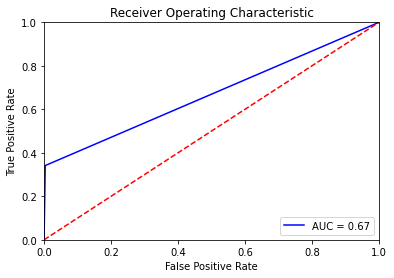

In [ ]:
import sklearn.metrics as metrics

fpr1, tpr1, threshold1 = metrics.roc_curve(y1_test, y1_pred)
roc_auc1 = metrics.auc(fpr1, tpr1)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Podemos apreciar una curva ROC no satisfactoria para este modelo, esto dado el bajo área bajo la curva. Lo anteiror podría ser causado dada la baja cantidad de datos de lciente smorosos.

# Desafío 4.b: Entrenar (Clasificacion student)

A partir del modelo depurado, genere un modelo predictivo con las siguientes características:
*   Estandarize la matriz de atributos.
*   Genere subconjuntos de entrenamiento y validación, separando el 33% de la muestra en el
conjunto de validación.
*   Implemente el modelo sin alterar los hiperparámetros.
*   Genere la predicción de las clases y de la probabilidad.
*   Reporte las métricas de precision, recall y f1 para ambas clases.
*   Grafique la curva Receiver Operator Characteristic.
*   En base a los pasos, comente sobre el desempeño predictivo del modelo.




In [ ]:
x2 = data.iloc[:, [0,2,3]].values
y2 = data.iloc[:,1].values

sc2 = StandardScaler()
x2 = sc2.fit_transform(x2)

y2=y2.astype('int')

x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=0.33, random_state=0)

modelo2 = LogisticRegression()
modelo2.fit(x2_train,y2_train)

y2_pred = modelo2.predict(x2_test)

print('Datos de entrenamiento')
print(y2_test)
print('Datos obtenidos en la prediccion')
print(y2_pred)


Datos de entrenamiento
[1 0 0 ... 1 0 0]
Datos obtenidos en la prediccion
[1 0 0 ... 1 0 0]


Se crea un modelo de clasidicación que predice si el cliente es estudiante o no.

In [ ]:
reporte2 = classification_report(y2_test, y2_pred)
print(reporte2)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2310
           1       0.88      0.92      0.90       990

    accuracy                           0.94      3300
   macro avg       0.92      0.93      0.93      3300
weighted avg       0.94      0.94      0.94      3300



Se aprecia un puntaje f1 de 0.96 resultado de los altos valores de precisión y sensibilidad para determinar que los clientes que no son estudiantes, así también tiene un alto valor de f1 para los clientes que sí son estudiantes.

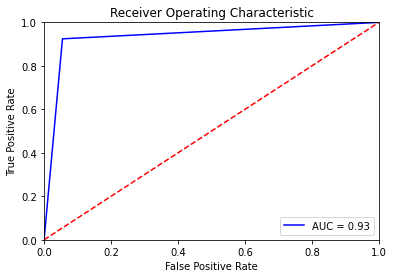

In [ ]:
import sklearn.metrics as metrics

fpr2, tpr2, threshold2 = metrics.roc_curve(y2_test, y2_pred)
roc_auc2 = metrics.auc(fpr2, tpr2)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Se puede apreciar una curva ROC más satisfactoria de la anterior con un área bajo la curva cercana a 1. 